<a href="https://colab.research.google.com/github/naoya1110/al_robotics_lab_2023_hands_on/blob/main/Week04_Simple_MLP_Model_with_the_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NCKU-NITKC AI Robotics Lab - Week 04

## Introduction

In this notebook, we will take our first step into deep learning. We will build a very simple neural network model, specifically a multi-layer perceptron (MLP), using PyTorch, and then train it with the Iris dataset. Our goal is to implement an MLP model capable of classifying three different types of irises.


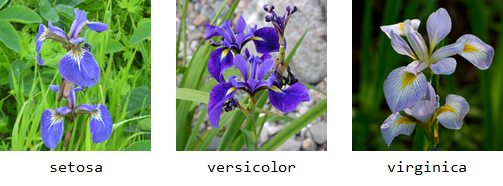

The model we'll be using here isn't necessarily deep, so we may not strictly call it "deep learning." However, most of the processes involved are common to deeper neural network models.

In this notebook, we will cover the following:

* The workflow of deep learning programming
* Building and training a simple MLP model
* Understanding concepts like linear layers (fully-connected layers), activation functions, loss functions, optimizers, etc.

First, let's import some general Python packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns     # data visualization package based on matplotlib

## Data Preparation

### Iris Dataset

The Iris dataset can be loaded from the scikit-learn dataset (`sklearn.datasets`) module. Scikit-learn is a popular machine-learning package in Python. While it's not designed for deep learning, it offers many useful tools for data processing and analysis, which we will frequently use in this lecture.

*   scikit-learn https://scikit-learn.org/stable/
*   Iris dataset https://en.wikipedia.org/wiki/Iris_flower_data_set

In [2]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(iris_data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

The original Iris dataset is in Python dictionary format. To view the dataset more clearly, we can convert it to a Pandas DataFrame.

In [3]:
df_iris = pd.DataFrame(iris_data["data"], columns=iris_data["feature_names"])
df_iris["label"] = iris_data["target"]
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


As shown above, the dataset consists of 4 feature values (sepal length, sepal width, petal length, and petal width) and the iris type label (target) for 150 samples.

If you want to view the data for the n-th sample,

In [4]:
n = 50
df_iris.iloc[n]

sepal length (cm)    7.0
sepal width (cm)     3.2
petal length (cm)    4.7
petal width (cm)     1.4
label                1.0
Name: 50, dtype: float64

By the way, if you're not familiar with the terms 'sepal' and 'petal,' please refer to the explanations below.

https://www.math.umd.edu/~petersd/666/html/iris_pca.html

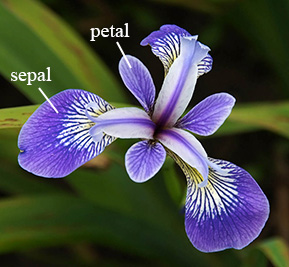

The label corresponds to one of the three iris types, as shown in the table below.

|  label  |  name of iris  |
| :----: | :----: |
|  0  |  setosa  |
|  1  |  versicolor |
| 2| virginica|


To visualize relationships between features and labels, `sns.pairplot()` may be useful.

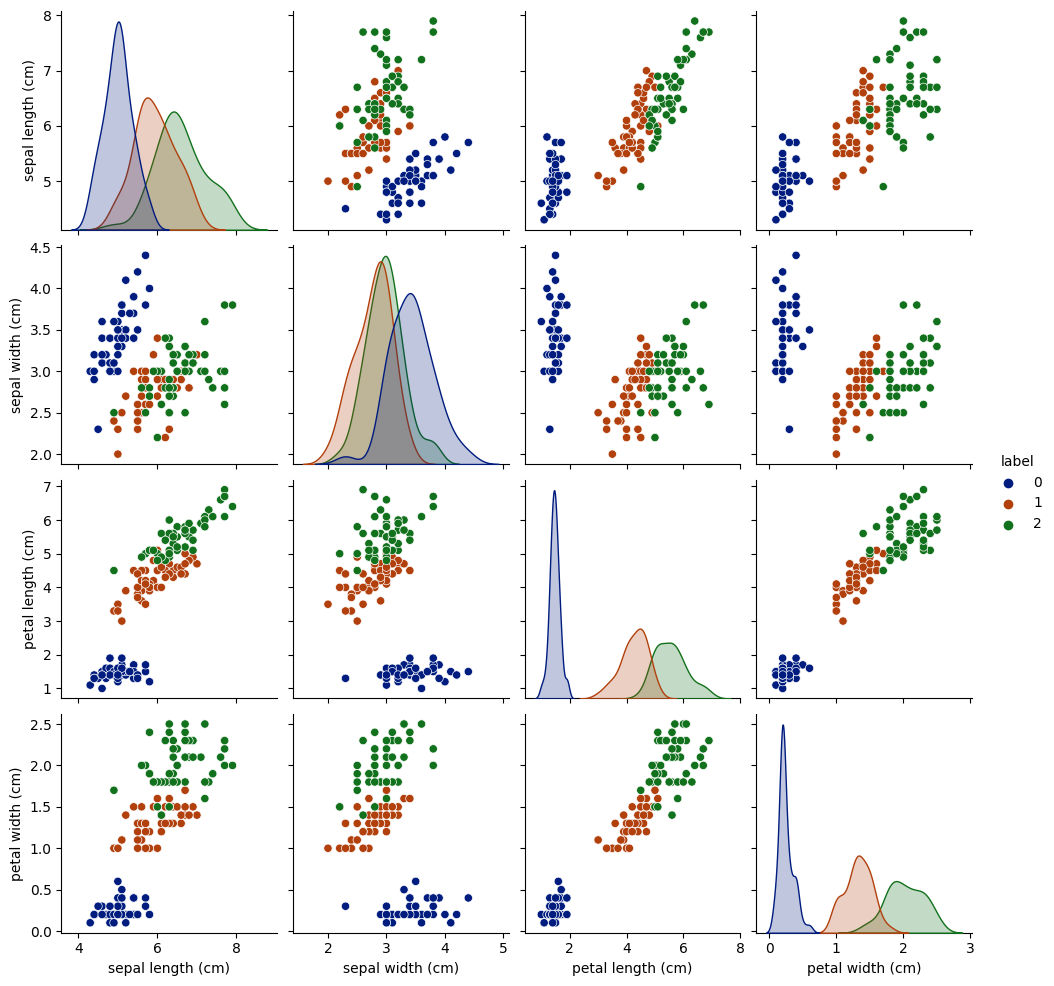

In [5]:
sns.pairplot(df_iris, hue="label", palette="dark")

The goal here is to implement an MLP model that classifies the iris type based on its four feature values: sepal length, sepal width, petal length, and petal width. Consequently, these four feature values will serve as the input data `x`, while the label number will be the output data `y` for the model.

To feed the data into a PyTorch deep learning model, we need to prepare the data through preprocessing.

### torch.tensor

First, convert the input `x` and output `y` data to `torch.tensor` so that PyTorch can handle them, ensuring that the data type (`dtype`) of `x` is set to `torch.float32` and `y` is set to `torch.int64`."

In [6]:
import torch

x = torch.tensor(iris_data["data"], dtype=torch.float32)
y = torch.tensor(iris_data["target"], dtype=torch.int64)

### TensorDataset

Next, create a `TensorDataset` object named `xy_dataset` from the `x` and `y` data.

In [7]:
from torch.utils.data import TensorDataset

xy_dataset = TensorDataset(x, y)
len(xy_dataset)

150

By indexing `xy_dataset`, we can access the input and output data for each sample.

In [8]:
xy_dataset[50]

(tensor([7.0000, 3.2000, 4.7000, 1.4000]), tensor(1))

### train test split




We've prepared `xy_dataset` for training the model. However, we shouldn't use all of it for training. We need to evaluate the model after training, and this evaluation should be done with a dataset that was not used for training. Therefore, we need to split `xy_dataset` into training data (`xy_train`) and evaluation/testing data (`xy_test`)."

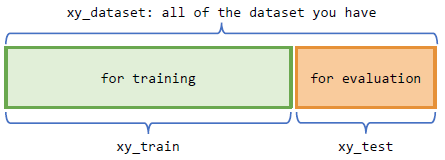

In [9]:
from torch.utils.data import random_split

train_size = 100   # define train_size
test_size = 50     # define test_size

# randomly split xy_dataset into xy_train and xy_test
xy_train, xy_test = random_split(xy_dataset, [train_size, test_size])

# check length of xy_train and xy_test
print("xy_train", len(xy_train))
print("xy_test", len(xy_test))

xy_train 100
xy_test 50


### Data Loader

To feed the data to the model for training, we create `DataLoader` objects named `train_loader` and `test_loader`.

We set the `batch_size` parameter to 5 in the data loaders, which means we feed sets of 5 input-output data pairs to the model at a time. While the Iris dataset isn't very large and can be fed all at once, deep neural network models often work with much larger datasets that can't fit into memory simultaneously. Therefore, batch processing is essential to handle memory limitations. Additionally, we have the option to shuffle the data's order, which is generally recommended for training in most cases.

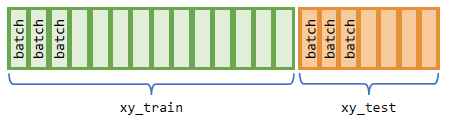

In [10]:
from torch.utils.data import DataLoader

train_loader = DataLoader(xy_train, batch_size=5, shuffle=True)
test_loader = DataLoader(xy_test, batch_size=5, shuffle=False)

By iterating through the `DataLoader` in a for loop, we can access the input and output data with the specified batch size.

In [11]:
for x_batch, y_batch in train_loader:
    print(x_batch)
    print(y_batch)
    break

tensor([[6.6000, 2.9000, 4.6000, 1.3000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [6.3000, 3.3000, 6.0000, 2.5000]])
tensor([1, 0, 0, 1, 2])


That's it for data preparation!

## Building a Model

### Model Architecture

The next step is to build a neural network model.

We'll define an MLP model with three layers: input, hidden, and output. The input layer has four neurons for the four feature values. The hidden layer can have any number of neurons, and the output layer consists of three neurons corresponding to the three iris types. The neuron with the highest value among the three indicates the most probable iris type predicted by the model.

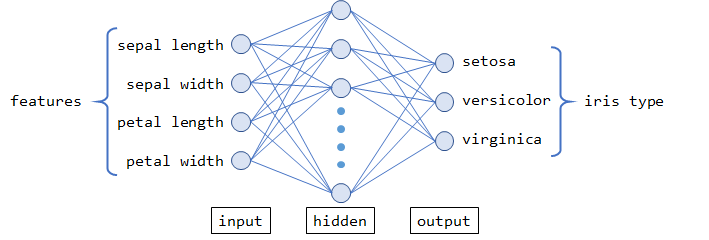

In PyTorch, it is customary to define a model using a custom Python class object, so we'll follow this approach.

In [12]:
import torch.nn as nn

# define a custom class named "Model"
class Model(nn.Module):

    # Constructor
    def __init__(self):                 # do not change
        super(Model, self).__init__()   # do not change

        # define a network named "classifier"
        self.classifier = nn.Sequential(
            nn.Linear(in_features=4, out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10, out_features=3)
        )

    # Instance method
    def forward(self, x):        # do not change
        x = self.classifier(x)
        return x

model = Model()    # construct an instance of the Model class
print(model)

Model(
  (classifier): Sequential(
    (0): Linear(in_features=4, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=3, bias=True)
  )
)


The model we defined here consists of Linear layers and an activation function of ReLU. But what do they do?

### Linear Layers

Linear Layers also known as Fully Connected Layers or Dense Layers, play a crucial role in neural networks.

Let's consider an example where we have 'layer0' with three neurons ($x_0$, $x_1$, $x_2$), followed by a Linear Layer named 'layer1' with two neurons ($y_0$, $y_1$). In a Linear Layer, each neuron in 'layer1' is connected to every neuron in 'layer0' with different weights ($w_{00}$, $w_{01}$, $w_{02}$, $w_{10}$, $w_{11}$, $w_{12}$) and biases ($b_0$, $b_1$).

These weights and biases determine the strength of connections between neurons and introduce the capacity of the model to learn different patterns and relationships in the data.

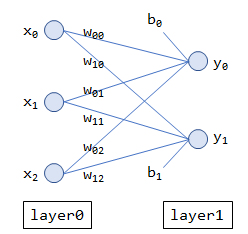

The values of $y_0$ and $y_1$ are calculated using the values of the neurons in the previous layer, along with the respective weights and biases. Importantly, all weights and biases are trainable parameters of the model.


$y_0 = w_{00}x_0 + w_{01}x_1 + w_{02}x_2 + b_0$

$y_1 = w_{10}x_0 + w_{11}x_1 + w_{12}x_2 + b_1$

Let's perform the above calculations using code.

In [13]:
X = torch.tensor([0.2, 0.7, -0.5])     # [x0, x1, x2] nodes in layer0

W0 = torch.tensor([1.0, 0.1, 0.5])     # [w00, w01, w02] weights for y0
W1 = torch.tensor([-0.6, 0.8, 0.2])    # [w10, w11, w12] weights for y1
b0 = 0.5                               # bias for y0
b1 = -0.7                              # bias for y1

y0 = torch.sum(W0*X)+b0
y1 = torch.sum(W1*X)+b1

print("y0 =", y0)
print("y1 =", y1)

y0 = tensor(0.5200)
y1 = tensor(-0.3600)


### ReLU - Activation Function

Typically, a linear layer is followed by an activation function. In this example, we apply an activation function called ReLU (Rectified Linear Unit) to the output of the 'linear1' layer. ReLU outputs 0 (zero value) if the input is negative and retains the same value if the input is positive.

In [14]:
def relu(x):
    return max(torch.tensor(0.0), x)

y0 = relu(y0)
y1 = relu(y1)

print("y0 =", y0)
print("y1 =", y1)

y0 = tensor(0.5200)
y1 = tensor(0.)


## Training

### Loss Function

During training, it's essential to quantify how far off the current model predictions are from the actual values. To do this, we use loss functions. For classification tasks, the cross-entropy loss function (nn.CrossEntropyLoss()) is commonly employed.


* `nn.CrossEntropyLoss()` https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

In [15]:
loss_func = nn.CrossEntropyLoss()

According to the link above, the cross-entroly loss is determined by the equation below, where $p_i$ represents the prediction (output value of the model) for the $i_{th}$ category and $p_y$ represents the prediction for the ground truth label.  

$\displaystyle \mathrm{loss} =  -\ln\left(\exp(p_y)/\sum_{i=0}^{n-1} \exp(p_i)\right) = -p_y + \ln\left(\sum_{i=0}^{n-1} \exp(p_i)\right)$

Let's check the above equation using codes.

In [16]:
p = torch.tensor([0.1, 3, -2])    # model outputs i.e. predictions for 3 classes [setosa, versicolor, verginica]
y = torch.tensor(1)               # ground truth label index [versicolor]

loss = -p[y] + torch.log(torch.sum(torch.exp(p)))
loss

tensor(0.0599)

In [17]:
p = torch.tensor([[0.1, 3, -2]])
y = torch.tensor([1])

loss_func(p, y)

tensor(0.0599)

### Optimizer

During the model training process, the model parameters (weights and biases) are updated to minimize the loss value. These algorithms for updating model parameters are known as optimizers. In this case, we're using the 'Adam' optimizer, but there are various optimizers available. The parameter `lr`, which stands for learning rate, controls the extent to which model parameters are adjusted in response to the loss value.

* `optim.Adam()` https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam

In [18]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=1E-3)

### Training Loop

Now we are ready to train the model. The code for the training process is somewhat lengthy, but the majority of the training procedures are applicable to other datasets and models. Once you become familiar with it, it will become more straightforward.

The main components of the training loop are outlined below.






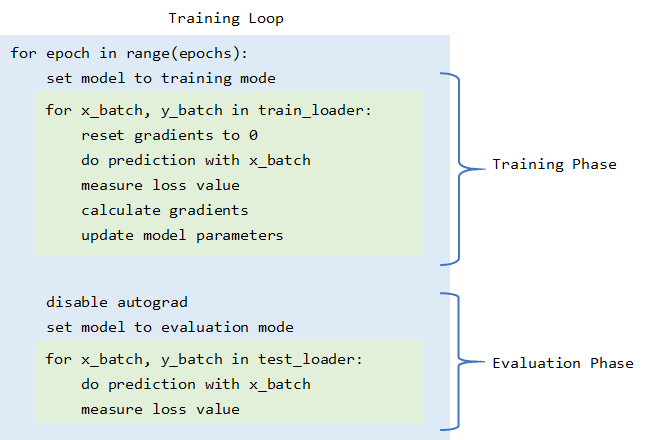

In [19]:
model = Model()                                        # load model
loss_func = nn.CrossEntropyLoss()                      # set loss function
optimizer = optim.Adam(model.parameters(), lr=1E-3)    # set optimizer


epochs = 50  # set total epochs

# create empty lists for saving metrics during training
train_loss_list = []
train_accuracy_list = []
test_loss_list = []
test_accuracy_list = []

# training loop
for epoch in range(epochs):

    # initialize metrics
    train_correct_count = 0
    train_accuracy = 0
    train_loss = 0
    test_correct_count = 0
    test_accuracy = 0
    test_loss = 0

    #--- Training Phase ---#
    model.train()    # set model to training mode

    for x_batch, y_batch in train_loader:      # take mini batch data from train_loader
        optimizer.zero_grad()                  # reset gradients to 0
        p_batch = model(x_batch)               # do prediction
        loss = loss_func(p_batch, y_batch)     # measure loss
        loss.backward()                        # calculate gradients of loss
        optimizer.step()                       # update model parameters

        train_loss += loss.item()                                # accumulate loss value
        p_batch_label = torch.argmax(p_batch, dim=1)             # convert p_batch vector to p_batch_label
        train_correct_count += (p_batch_label == y_batch).sum()  # count up number of correct predictions
    #----------------------#

    #--- Evaluation Phase ---#
    with torch.no_grad():   # disable autograd for saving memory usage
        model.eval()        # set model to evaluation mode

        for x_batch, y_batch in test_loader:      # take mini batch data from test_loader
            p_batch = model(x_batch)              # do prediction
            loss = loss_func(p_batch, y_batch)    # calculate loss

            test_loss += loss.item()                                # accumulate loss value
            p_batch_label = torch.argmax(p_batch, dim=1)            # convert p_batch vector to p_batch_label
            test_correct_count += (p_batch_label == y_batch).sum()  # count up number of correct predictions
    #------------------------#

    train_accuracy = train_correct_count/len(xy_train)   # determine accuracy for training data
    test_accuracy = test_correct_count/len(xy_test)      # determine accuracy for test data
    train_loss = train_loss/len(train_loader)            # determine loss for training data
    test_loss = test_loss/len(test_loader)               # determine loss for test data

    # show and store metrics
    print(f"Epoch {epoch+1} Train: Accuracy={train_accuracy:.3f} Loss={train_loss:.3f}, Test: Accuracy={test_accuracy:.3f} Loss={test_loss:.3f}")
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(train_loss)
    test_accuracy_list.append(test_accuracy)
    test_loss_list.append(test_loss)

Epoch 1 Train: Accuracy=0.350 Loss=1.245, Test: Accuracy=0.300 Loss=1.260
Epoch 2 Train: Accuracy=0.350 Loss=1.147, Test: Accuracy=0.300 Loss=1.169
Epoch 3 Train: Accuracy=0.350 Loss=1.107, Test: Accuracy=0.300 Loss=1.121
Epoch 4 Train: Accuracy=0.350 Loss=1.084, Test: Accuracy=0.300 Loss=1.101
Epoch 5 Train: Accuracy=0.300 Loss=1.068, Test: Accuracy=0.300 Loss=1.083
Epoch 6 Train: Accuracy=0.320 Loss=1.053, Test: Accuracy=0.300 Loss=1.067
Epoch 7 Train: Accuracy=0.330 Loss=1.039, Test: Accuracy=0.300 Loss=1.048
Epoch 8 Train: Accuracy=0.350 Loss=1.024, Test: Accuracy=0.300 Loss=1.030
Epoch 9 Train: Accuracy=0.370 Loss=1.007, Test: Accuracy=0.300 Loss=1.013
Epoch 10 Train: Accuracy=0.520 Loss=0.991, Test: Accuracy=0.680 Loss=0.991
Epoch 11 Train: Accuracy=0.630 Loss=0.975, Test: Accuracy=0.700 Loss=0.967
Epoch 12 Train: Accuracy=0.640 Loss=0.956, Test: Accuracy=0.700 Loss=0.952
Epoch 13 Train: Accuracy=0.650 Loss=0.937, Test: Accuracy=0.700 Loss=0.927
Epoch 14 Train: Accuracy=0.650 Los

### Learning Curves

After training the model it is always good to check how the training went, how the accuracy and loss changed.

Let's visualize accuracy curves for train and test data.

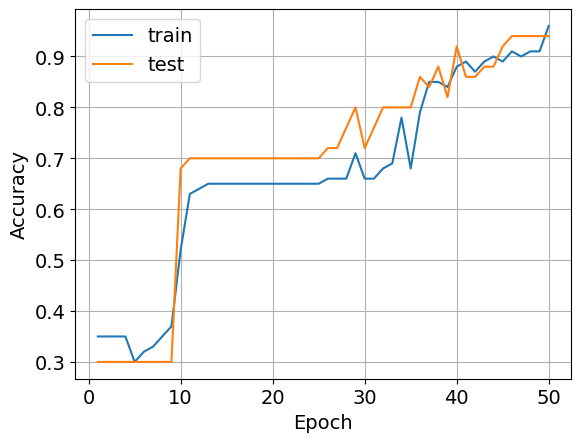

In [20]:
plt.rcParams["font.size"]=14
plt.plot(np.arange(epochs)+1, train_accuracy_list, label="train")
plt.plot(np.arange(epochs)+1, test_accuracy_list, label="test")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

Also let's vizualize loss curves for train and test data.

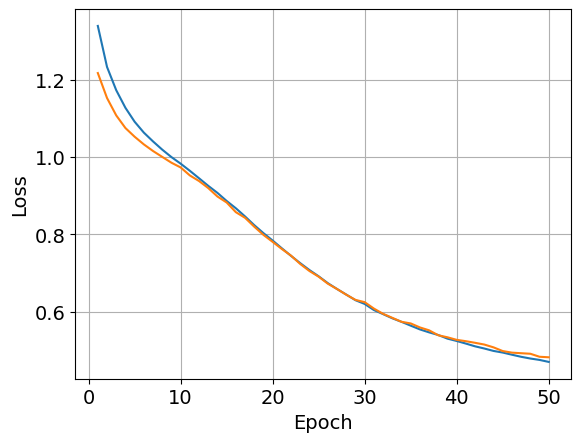

In [ ]:
plt.plot(np.arange(epochs)+1, train_loss_list, label="train")
plt.plot(np.arange(epochs)+1, test_loss_list, label="test")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

## Evaluation

### Test Accuracy

Let's check accuracy of the trained model for the test data.

In [ ]:
test_correct_count = 0

y_test_all = np.array([])
p_label_all = np.array([])

with torch.no_grad():   # disable autograd for saving memory usage
    model.eval()        # set model to evaluation mode

    for x_batch, y_batch in test_loader:      # take mini batch data from test_loader
        p_batch = model(x_batch)              # do prediction

        p_batch_label = torch.argmax(p_batch, dim=1)            # convert p_batch vector to p_batch_label
        test_correct_count += (p_batch_label == y_batch).sum()  # count up number of correct predictions

        y_test_all = np.append(y_test_all, y_batch.numpy())          # append y_batch in y_test_all
        p_label_all = np.append(p_label_all, p_batch_label.numpy())  # append p_batch_label in p_label_all

test_accuracy = test_correct_count/len(xy_test)      # determine accuracy for test data
print(f"Test Accuracy = {test_accuracy:.3f}")

Test Accuracy = 0.940


### Confusion Matrix

It is also good to check the confusion matrix to know the accuracies for each categories.

Text(0.5, 1.0, 'confusion matrix')

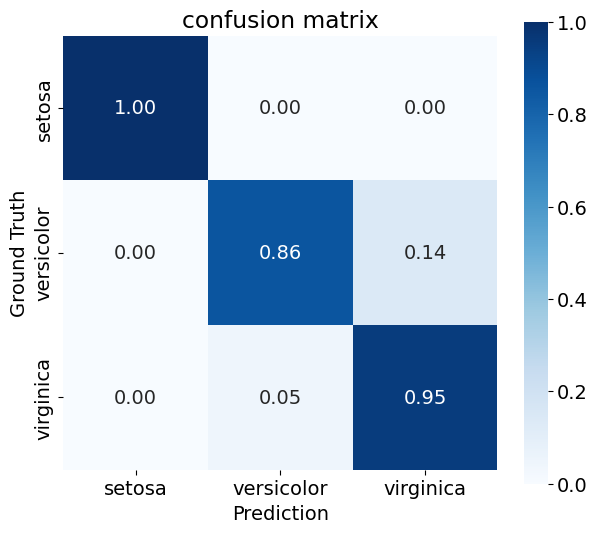

In [ ]:
from sklearn.metrics import confusion_matrix

cmx = confusion_matrix(y_test_all, p_label_all)

cmx_pct = np.zeros(cmx.shape)

for i in range(cmx.shape[0]):
    for j in range(cmx.shape[1]):
        cmx_pct[i, j] = cmx[i, j]/cmx[i, :].sum()

plt.figure(figsize=(7,6))
labels = iris_data["target_names"]

sns.heatmap(cmx_pct, annot=True, fmt=".2f", cmap="Blues", vmin=0, vmax=1,
            xticklabels=labels, yticklabels=labels, square=True)

plt.ylabel("Ground Truth")
plt.xlabel("Prediction")
plt.title("confusion matrix")

## Prediction with New Data
Let's say we have obtained new input data, specifically, the four feature values of a new, unknown iris sample.

In [21]:
# unknown sample data
sepal_l = 3.0
sepal_w = 2.0
petal_l = 1.0
petal_w = 0.5

x = [sepal_l, sepal_w, petal_l, petal_w]
x = torch.tensor([x], dtype=torch.float32)
print(x)

tensor([[3.0000, 2.0000, 1.0000, 0.5000]])


We can make a prediction for this new sample using the trained model. It's important to note that we apply the `nn.Softmax()` function to the predicted values. `nn.Softmax()` is defined as:

$\displaystyle \mathrm{Softmax}(x_i) = \exp(x_i)/\sum_{j=0}^{N-1}\exp(x_j)$

This function rescales the predicted values to range from 0 to 1 and sums to 1. We can interpret these rescaled values as probabilities for the three Iris types."

In [22]:
with torch.no_grad():
    pred = model(x)
    print("pred =", pred)

    softmax = nn.Softmax()
    prob = softmax(pred[0])
    print("prob =", prob)

pred = tensor([[ 1.4701, -0.2267, -1.6614]])
prob = tensor([0.8150, 0.1494, 0.0356])


<ipython-input-22-703fef9f768e>:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob = softmax(pred[0])


In [23]:
print("Probablity")
print(f"setosa {prob[0].item():.1%}")
print(f"vesicolor {prob[1].item():.1%}")
print(f"virginica {prob[2].item():.1%}")

Probablity
setosa 81.5%
vesicolor 14.9%
virginica 3.6%


## Practice

Let's try modifying the MLP model as follows


* The model has two hidden layers.
* Set the first hidden layer to have 10 neurons and apply a ReLU activation function.
* Set the second hidden layer to have 20 neurons and apply a ReLU activation function.

After making these modifications, proceed to train the model again!

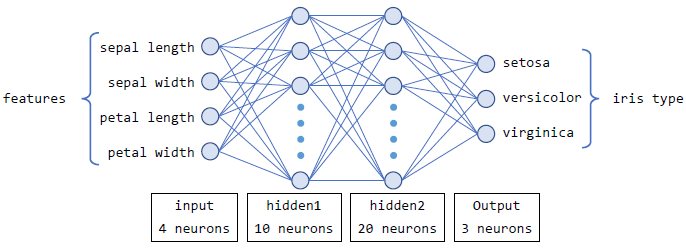

## Conclusion

That's it for this week. We have covered the very basics of deep learning. Now, you can experiment by adjusting various hyperparameters listed below to observe how the results change:

* Batch size in the data loader
* Number of neurons in the hidden layer
* Number of hidden layers
* Learning rate of the optimizers
* Type of optimizers
* Number of epochs
* And more

